# PATEL SMITKUMAR KAUSHIKKUMAR (CIN 306587208)
# CS 5661 : Homework 1


# Cancer Diagnosis Using Machine Learning

### Write and submit your python codes in “Jupyter Notebook” to perform the following tasks. Make sure to provide proper descriptions as MarkDown for each section of your code. In this homework, we work with a real dataset from UCI Dataset.

##### a- Read the dataset file “Cancer.csv” (you should download it from CSNS), and store it in a Pandas DataFrame. Check out the dataset. The dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign tumor). You will use all 9 features in this homework.

In [1]:
# Required Libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

from xgboost import XGBClassifier

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
cancer_df = pd.read_csv("D:\MASTERS\SEMESTER_5\CS 5661\Homework\Homework_1\Cancer.csv")
cancer_df[0::10]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
10,5,3,3,3,2,3,4,4,1,1
20,5,4,4,9,2,10,5,6,1,1
30,9,5,8,1,2,3,2,1,5,1
40,5,3,5,5,3,3,4,10,1,1
50,5,1,3,1,2,1,2,1,1,0
60,2,2,2,1,1,1,7,1,1,0
70,1,1,1,1,2,1,3,1,1,0
80,10,3,5,1,10,5,3,10,2,1
90,1,3,1,2,2,2,5,3,2,0


In [3]:
list(cancer_df)

['Clump_Thickness',
 'Uniformity_of_Cell_Size',
 'Uniformity_of_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses',
 'Malignant_Cancer']

In [4]:
feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
X = cancer_df[feature_cols]
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [5]:
y = cancer_df['Malignant_Cancer']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Malignant_Cancer, dtype: int64

##### b- Use sklearn functions to split the dataset into testing and training sets with the following parameters: 
- test_size=0.3, random_state=2.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

##### c- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). Then, calculate and report the accuracy and AUC of your classifier. Later in part (g), you will plot the ROC curve as well. 

##### Use this command to define your tree:
- my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [7]:
decisiontree = DecisionTreeClassifier(random_state=2)
decisiontree.fit(X_train, y_train)
y_predict_dt = decisiontree.predict(X_test)
accuracy_score_dt = accuracy_score(y_test, y_predict_dt)
print('accuracy for Decisiontree: ', accuracy_score_dt)
y_predict_prob_DT = decisiontree.predict_proba(X_test)

fpr_DT, tpr_DT, thresholds_DT = metrics.roc_curve(y_test, y_predict_prob_DT[:,1], pos_label=1)
AUC_DT = metrics.auc(fpr_DT, tpr_DT)
print('AUC for Decisiontree',AUC_DT)



accuracy for Decisiontree:  0.8666666666666667
AUC for Decisiontree 0.8697478991596639


##### d- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.

#####  Note: you should write your own code to perform Bagging (don’t use scikit-learn functionsfor Bagging!)
    
##### To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0…18. In each iteration of the loop, you have to:
    
- make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size of bootstarp_size = 0.8*(Size of the original dataset). You can use the following command to generate a random bootstrap dataset (“i" is the variable of the loop, so the random_state changes in each iteration):
- resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)

- Define and train a new base decision tree classifier on this dataset in each iteration:
-     Base_DecisionTree = DecisionTreeClassifier(random_state=2).
                                                
- Test “this base classifier” on the original “Testing” Dataset build in part(b), and save the prediction results for all testing samples.

##### Then, Perform Voting to make the final decision on each data sample based on the votes of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging method.

##### NOTE: You need to calculate the probability of “malignant cancer” to be able to find AUC and plot the ROC curve. As mentioned in the class, you can consider the average (mean) of the votes as the probability for each sample.

In [8]:
b_results = []
for i in range(29):
        bootstrap_size = 0.8 * (X_train.shape[0])
        B, c = resample(X_train, y_train, n_samples=int(bootstrap_size), random_state=i, replace=True)

        Base_DecisionTree = DecisionTreeClassifier(random_state=3)
        
        Base_DecisionTree.fit(B, c)
        c_predict = Base_DecisionTree.predict(X_test)

        b_results.append(c_predict)        
    
col = len(b_results[0])
row = len(b_results)

voting = []

for i in range(col):
    vote_col = 0
    for j in range(row):
        if b_results[j][i] == 0:
            vote_col -= 1
        else:
            vote_col += 1
    if vote_col < 0:
        vote_col = 0
    elif vote_col > 0:
        vote_col = 1

    voting.append(vote_col)

b_score = accuracy_score(y_test, voting)
print('Accuracy for BAGGING :',b_score)

bagging_results = pd.DataFrame()
bagging_results['actual'] = y_test
bagging_results['prediction'] = voting


#print(bagging_results)
fpr_B, tpr_B, thresholds_B = metrics.roc_curve(y_test, voting, pos_label=1)
AUC_B = metrics.auc(fpr_B, tpr_B)
print('AUC for BAGGING :' , AUC_B)



Accuracy for BAGGING : 0.9111111111111111
AUC for BAGGING : 0.9054621848739496


##### e- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
- from sklearn.ensemble import AdaBoostClassifier
- my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [9]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29, random_state=2)
my_AdaBoost.fit(X_train,y_train)
my_AdaBoost_predict= my_AdaBoost.predict(X_test)
#print(my_AdaBoost_predict)
accuracy_myAdaBoost =accuracy_score(y_test,my_AdaBoost_predict)
print("Accuracy for AdaBoost:",accuracy_myAdaBoost)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_Ab = my_AdaBoost.predict_proba(X_test)
fpr_AB, tpr_AB, thresholds_AB = metrics.roc_curve(y_test, y_predict_prob_Ab[:,1], pos_label=1)
AUC_AB = metrics.auc(fpr_AB, tpr_AB)
print('AUC for AdaBoost',AUC_AB)

Accuracy for AdaBoost: 0.9555555555555556
AUC for AdaBoost 0.9653361344537815


##### f- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. This algorithm is not included in sklearn, so you need to install the XGBoost library. Please see this for more infor: https://xgboost.readthedocs.io/en/latest/build.html Mac users can easily install it with “pip install xgboost”.Repeat part (e) with XGBoost. Use this command to import and define your classifier:
- from xgboost import XGBClassifier
- my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [10]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train,y_train)
my_XGBoost_predict= my_XGBoost.predict(X_test)
accuracy_my_XGBoost =accuracy_score(y_test,my_XGBoost_predict)
print("Accuracy for XGBoost:",accuracy_my_XGBoost)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_XGB = my_XGBoost.predict_proba(X_test)
fpr_XGB, tpr_XGB, thresholds_XGB = metrics.roc_curve(y_test, y_predict_prob_XGB[:,1], pos_label=1)
AUC_XGB = metrics.auc(fpr_XGB, tpr_XGB)
print('AUC for XGBoost ',AUC_XGB)

Accuracy for XGBoost: 0.9555555555555556
AUC for XGBoost  0.9621848739495799


##### g- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:
- from sklearn.ensemble import RandomForestClassifier
- my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

In [11]:
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=2)
my_RandomForest.fit(X_train, y_train)
rf_predict = my_RandomForest.predict(X_test)
rf_score = accuracy_score(y_test, rf_predict)
rf_results = pd.DataFrame()
rf_results['actual'] = y_test
rf_results['prediction'] = rf_predict
print('Accuracy for Randomforest: ',rf_score)

y_predict_prob_rf = my_RandomForest.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print('AUC for Randomforest: ',AUC_rf)

Accuracy for Randomforest:  0.9555555555555556
AUC for Randomforest:  0.9516806722689075


##### h- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.
- Which algorithm is the best w.r.t the AUC value?
- Which algorithm is the best w.r.t the Accuracy value?
- Which algorithm is the best when we want a False Positive Rate of %7?

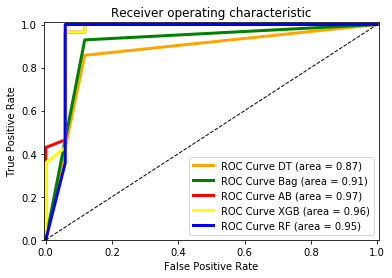

In [12]:
%matplotlib inline

plt.figure()

plt.plot(fpr_DT, tpr_DT, color='orange', lw=3, label='ROC Curve DT (area = %0.2f)' % AUC_DT)
plt.plot(fpr_B, tpr_B, color='green', lw=3, label='ROC Curve Bag (area = %0.2f)' % AUC_B)
plt.plot(fpr_AB, tpr_AB, color='red', lw=3, label='ROC Curve AB (area = %0.2f)' % AUC_AB)
plt.plot(fpr_XGB, tpr_XGB, color='yellow', lw=3, label='ROC Curve XGB (area = %0.2f)' % AUC_XGB)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=3, label='ROC Curve RF (area = %0.2f)' % AUC_rf)

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#### Which algorithm is the best w.r.t the AUC value?
- AdaBoost Algorithm (AUC for AdaBoost 0.9653361344537815) 

#### Which algorithm is the best w.r.t the Accuracy value?
- Adaboost (Accuracy for AdaBoost: 0.9555555555555556)
- Random Forest (Accuracy for Randomforest:  0.9555555555555556)
- XGBoost (Accuracy for XGBoost: 0.9555555555555556) 

#### Which algorithm is the best when we want a False Positive Rate of %7?
- Random Forest